# Football player Dataset Cleaning and Preparing

This dataset has been downloaded from  Kaggle https://www.kaggle.com/karangadiya/fifa19. License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
"""import bokeh as bk

from google.colab import drive
drive.mount('/gdrive', force_remount=True)"""

"import bokeh as bk\n\nfrom google.colab import drive\ndrive.mount('/gdrive', force_remount=True)"

In [45]:
INPUT_FILE_NAME = "FootballPlayerRawDataset.csv"
ATT_FILE_NAME = "FootballPlayerPreparedCleanAttributesCompleto.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "FootballPlayerOneHotEncodedClassesCompleto.csv"

In [81]:
dataset = pd.read_csv(INPUT_FILE_NAME, sep=",")

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

**First step:** Remove unnecesary columns

<AxesSubplot: >

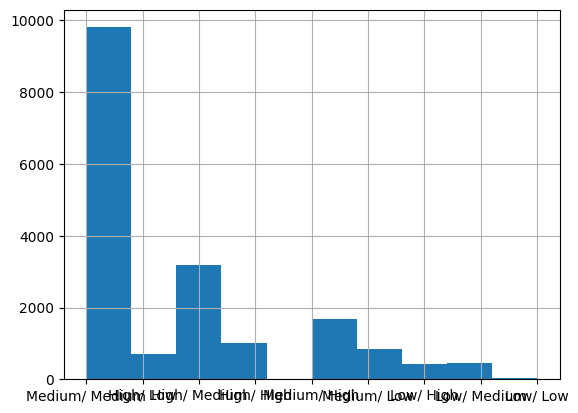

In [83]:
dataset['Work Rate'].hist()

<AxesSubplot: >

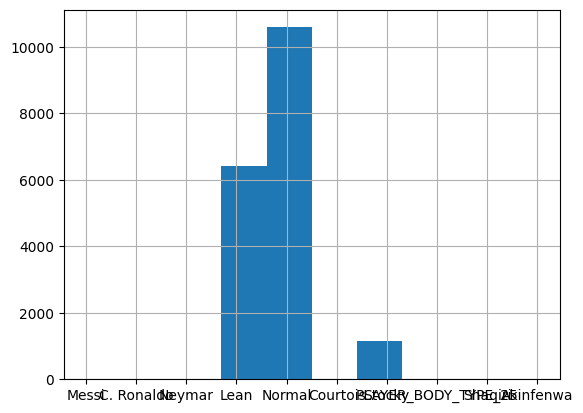

In [84]:
dataset['Body Type'].hist()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

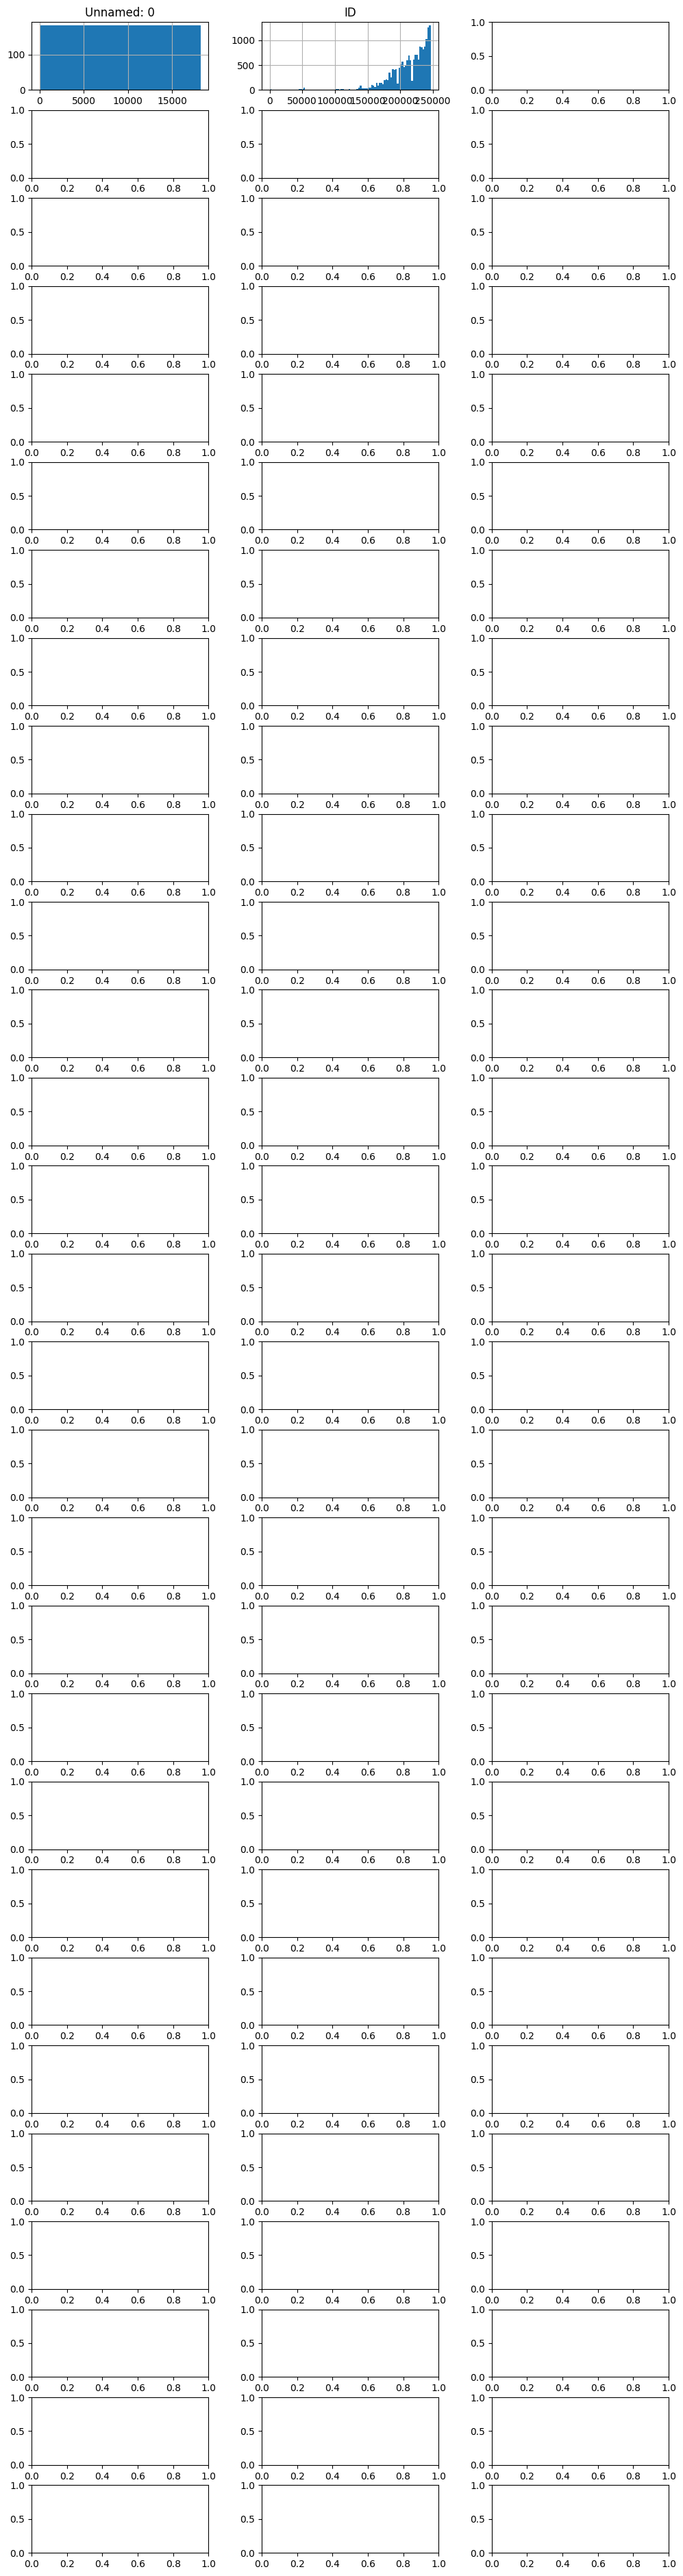

In [95]:
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(dataset.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        dataset.hist(column = dataset.columns[i], bins = 100, ax=axis)
        i = i+1

In [99]:
len(dataset.columns)


89

In [110]:
for col in dataset.columns:
    print(dataset.dtypes[col])

int64
int64
object
int64
object
object
object
int64
int64
object
object
object
object
int64
object
float64
float64
float64
object
object
object
object
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object


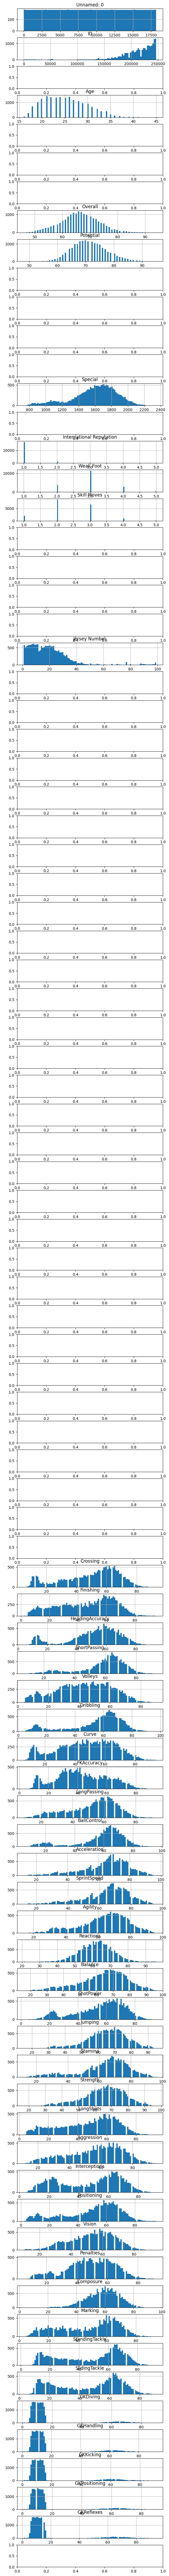

In [125]:
fig, axes = plt.subplots(89, 1, figsize=(7, 124))
for col, axis in zip(dataset.columns, axes):
    if dataset[col].dtypes != 'object':
        dataset.hist(column = col, bins = 100, ax=axis)

In [126]:
dataset.drop(dataset[dataset.Position=='GK'].index, inplace=True)

In [127]:
dataset = dataset.select_dtypes(exclude=['object'])

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16182 entries, 0 to 18206
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16182 non-null  int64  
 1   ID                        16182 non-null  int64  
 2   Age                       16182 non-null  int64  
 3   Overall                   16182 non-null  int64  
 4   Potential                 16182 non-null  int64  
 5   Special                   16182 non-null  int64  
 6   International Reputation  16134 non-null  float64
 7   Weak Foot                 16134 non-null  float64
 8   Skill Moves               16134 non-null  float64
 9   Jersey Number             16122 non-null  float64
 10  Crossing                  16134 non-null  float64
 11  Finishing                 16134 non-null  float64
 12  HeadingAccuracy           16134 non-null  float64
 13  ShortPassing              16134 non-null  float64
 14  Volley

In [129]:
dataset.drop(dataset.loc[:, 'Unnamed: 0':'ID'].columns, inplace=True, axis = 1)

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16182 entries, 0 to 18206
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16182 non-null  int64  
 1   Overall                   16182 non-null  int64  
 2   Potential                 16182 non-null  int64  
 3   Special                   16182 non-null  int64  
 4   International Reputation  16134 non-null  float64
 5   Weak Foot                 16134 non-null  float64
 6   Skill Moves               16134 non-null  float64
 7   Jersey Number             16122 non-null  float64
 8   Crossing                  16134 non-null  float64
 9   Finishing                 16134 non-null  float64
 10  HeadingAccuracy           16134 non-null  float64
 11  ShortPassing              16134 non-null  float64
 12  Volleys                   16134 non-null  float64
 13  Dribbling                 16134 non-null  float64
 14  Curve 

Then, we remove the goal keepers.

In [131]:
dataset.drop(dataset.loc[:, 'GKDiving':'GKReflexes'].columns, inplace=True, axis = 1)

In [132]:
dataset[:10]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,27,91,91,2142,4.0,4.0,4.0,10.0,81.0,84.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,32,91,91,2280,4.0,4.0,4.0,10.0,86.0,72.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,31,91,91,2346,5.0,4.0,3.0,9.0,77.0,93.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,32,91,91,2201,4.0,3.0,3.0,15.0,66.0,60.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,29,90,90,2152,4.0,4.0,4.0,9.0,62.0,91.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,28,90,90,2190,4.0,5.0,3.0,8.0,88.0,76.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


In [54]:
dataset[-10:]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
18196,19,47,61,1333,1.0,3.0,2.0,26.0,31.0,28.0,...,30.0,55.0,44.0,28.0,51.0,44.0,35.0,41.0,44.0,54.0
18197,18,47,61,1362,1.0,3.0,2.0,14.0,44.0,44.0,...,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0
18199,18,47,69,1303,1.0,3.0,2.0,65.0,31.0,31.0,...,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0
18200,18,47,62,1203,1.0,2.0,2.0,21.0,28.0,47.0,...,51.0,26.0,16.0,46.0,37.0,58.0,50.0,15.0,17.0,14.0
18201,18,47,68,1098,1.0,3.0,2.0,29.0,22.0,23.0,...,16.0,44.0,45.0,20.0,31.0,38.0,43.0,44.0,47.0,53.0
18202,19,47,65,1307,1.0,2.0,2.0,22.0,34.0,38.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,19,47,63,1098,1.0,2.0,2.0,21.0,23.0,52.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,16,47,67,1189,1.0,3.0,2.0,33.0,25.0,40.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,17,47,66,1228,1.0,3.0,2.0,34.0,44.0,50.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0
18206,16,46,66,1321,1.0,3.0,2.0,33.0,41.0,34.0,...,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0


**Second Step:** find out whether or not there are missing values and remove the least influential attributes. 

In [133]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Age': 0,
 'Overall': 0,
 'Potential': 0,
 'Special': 0,
 'International Reputation': 48,
 'Weak Foot': 48,
 'Skill Moves': 48,
 'Jersey Number': 60,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 48,
 'Acceleration': 48,
 'SprintSpeed': 48,
 'Agility': 48,
 'Reactions': 48,
 'Balance': 48,
 'ShotPower': 48,
 'Jumping': 48,
 'Stamina': 48,
 'Strength': 48,
 'LongShots': 48,
 'Aggression': 48,
 'Interceptions': 48,
 'Positioning': 48,
 'Vision': 48,
 'Penalties': 48,
 'Composure': 48,
 'Marking': 48,
 'StandingTackle': 48,
 'SlidingTackle': 48}

Since we have enough data, we remove all rows with missing values in any attribute

In [134]:
dataset.dropna (inplace=True)
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Age': 0,
 'Overall': 0,
 'Potential': 0,
 'Special': 0,
 'International Reputation': 0,
 'Weak Foot': 0,
 'Skill Moves': 0,
 'Jersey Number': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0}

In [14]:
dataset.shape

(18147, 42)

The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously. 

In [135]:
dataset.corr()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Age,1.000000,0.455509,-0.266447,0.410383,0.257815,0.090614,0.102558,-0.239774,0.263204,0.144203,...,0.271537,0.396263,0.279857,0.187764,0.238707,0.248733,0.468578,0.232917,0.205382,0.177007
Overall,0.455509,1.000000,0.650382,0.795822,0.502080,0.209372,0.505221,-0.210406,0.496603,0.373079,...,0.502109,0.452916,0.333275,0.438692,0.524361,0.391124,0.801749,0.305698,0.264082,0.224365
Potential,-0.266447,0.650382,1.000000,0.466060,0.368074,0.146798,0.414331,0.003727,0.273024,0.253522,...,0.288501,0.156743,0.131119,0.274311,0.348356,0.229691,0.470064,0.145597,0.120832,0.103901
Special,0.410383,0.795822,0.466060,1.000000,0.406641,0.257607,0.585897,-0.163340,0.754480,0.525550,...,0.724630,0.422226,0.324087,0.653963,0.764618,0.513913,0.741967,0.267453,0.251760,0.220574
International Reputation,0.257815,0.502080,0.368074,0.406641,1.000000,0.134457,0.271294,-0.071166,0.263117,0.223799,...,0.276826,0.210173,0.143063,0.253360,0.312202,0.285083,0.441995,0.134482,0.106883,0.088296
Weak Foot,0.090614,0.209372,0.146798,0.257607,0.134457,1.000000,0.263350,-0.027206,0.212149,0.288825,...,0.285451,-0.021527,-0.093328,0.270168,0.289325,0.249097,0.226862,-0.101490,-0.121429,-0.133705
Skill Moves,0.102558,0.505221,0.414331,0.585897,0.271294,0.263350,1.000000,-0.030199,0.544803,0.583472,...,0.587951,-0.060180,-0.173385,0.610801,0.621431,0.483533,0.495878,-0.195433,-0.217610,-0.240243
Jersey Number,-0.239774,-0.210406,0.003727,-0.163340,-0.071166,-0.027206,-0.030199,1.000000,-0.088810,0.014268,...,-0.040636,-0.176322,-0.179758,-0.008784,-0.066588,-0.007876,-0.177059,-0.167950,-0.157633,-0.143084
Crossing,0.263204,0.496603,0.273024,0.754480,0.263117,0.212149,0.544803,-0.088810,1.000000,0.413404,...,0.548462,0.105539,0.125985,0.585624,0.643948,0.371606,0.469666,0.086971,0.085429,0.078963
Finishing,0.144203,0.373079,0.253522,0.525550,0.223799,0.288825,0.583472,0.014268,0.413404,1.000000,...,0.803036,-0.201407,-0.491733,0.818964,0.655283,0.744835,0.412177,-0.503042,-0.558565,-0.585841


In [156]:
import matplotlib.pyplot as plt
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Quality,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Age,1.000000,0.433827,-0.266447,0.410383,0.257815,0.090614,0.102558,-0.239774,0.263204,0.144203,0.344275,0.306159,0.244419,0.103602,0.258692,0.305848,0.304539,0.250561,-0.206653,-0.199765,-0.016755,0.454947,-0.092422,0.303636,0.185675,0.220672,0.358897,0.271537,0.396263,0.279857,0.187764,0.238707,0.248733,0.468578,0.232917,0.205382,0.177007
Quality,0.433827,1.000000,0.589635,0.741021,0.377034,0.192370,0.485248,-0.195319,0.462769,0.346741,0.434302,0.669393,0.422481,0.474442,0.476876,0.434887,0.548903,0.657917,0.129934,0.149169,0.223541,0.791327,0.052416,0.535734,0.216081,0.423949,0.310830,0.472742,0.430457,0.311084,0.410394,0.490611,0.369964,0.752164,0.278697,0.240123,0.204754
Potential,-0.266447,0.589635,1.000000,0.466060,0.368074,0.146798,0.414331,0.003727,0.273024,0.253522,0.224162,0.494950,0.268922,0.415786,0.307009,0.234962,0.359355,0.521081,0.228673,0.233661,0.208617,0.505267,0.116235,0.330896,0.067937,0.207872,0.051135,0.288501,0.156743,0.131119,0.274311,0.348356,0.229691,0.470064,0.145597,0.120832,0.103901
Special,0.410383,0.741021,0.466060,1.000000,0.406641,0.257607,0.585897,-0.163340,0.754480,0.525550,0.202042,0.820301,0.614891,0.733118,0.756575,0.704692,0.747296,0.824903,0.354037,0.331981,0.511283,0.754148,0.349992,0.699103,0.211058,0.565079,0.120833,0.724630,0.422226,0.324087,0.653963,0.764618,0.513913,0.741967,0.267453,0.251760,0.220574
International Reputation,0.257815,0.377034,0.368074,0.406641,1.000000,0.134457,0.271294,-0.071166,0.263117,0.223799,0.243389,0.366256,0.310106,0.277794,0.303458,0.276931,0.300089,0.369094,0.025968,0.024052,0.096901,0.454234,0.047210,0.311419,0.105714,0.118857,0.126454,0.276826,0.210173,0.143063,0.253360,0.312202,0.285083,0.441995,0.134482,0.106883,0.088296
Weak Foot,0.090614,0.192370,0.146798,0.257607,0.134457,1.000000,0.263350,-0.027206,0.212149,0.288825,-0.013106,0.229903,0.289187,0.282982,0.270383,0.255213,0.173470,0.294572,0.149170,0.127792,0.218811,0.191669,0.161823,0.250295,0.007327,0.081852,-0.052364,0.285451,-0.021527,-0.093328,0.270168,0.289325,0.249097,0.226862,-0.101490,-0.121429,-0.133705
Skill Moves,0.102558,0.485248,0.414331,0.585897,0.271294,0.263350,1.000000,-0.030199,0.544803,0.583472,-0.104397,0.510854,0.585786,0.714952,0.622608,0.533427,0.383890,0.682585,0.445412,0.392145,0.536098,0.430504,0.391768,0.513890,-0.047895,0.203962,-0.173776,0.587951,-0.060180,-0.173385,0.610801,0.621431,0.483533,0.495878,-0.195433,-0.217610,-0.240243
Jersey Number,-0.239774,-0.195319,0.003727,-0.163340,-0.071166,-0.027206,-0.030199,1.000000,-0.088810,0.014268,-0.126105,-0.135476,-0.012697,-0.014059,-0.055097,-0.071178,-0.138618,-0.091944,0.034320,0.020039,-0.011102,-0.183991,0.041879,-0.056188,-0.098159,-0.171364,-0.167037,-0.040636,-0.176322,-0.179758,-0.008784,-0.066588,-0.007876,-0.177059,-0.167950,-0.157633,-0.143084
Crossing,0.263204,0.462769,0.273024,0.754480,0.263117,0.212149,0.544803,-0.088810,1.000000,0.413404,-0.134959,0.632386,0.472485,0.712261,0.714762,0.618580,0.592781,0.682796,0.439799,0.393403,0.547590,0.461861,0.435751,0.457531,-0.027529,0.351862,-0.177255,0.548462,0.105539,0.125985,0.585624,0.643948,0.371606,0.469666,0.086971,0.085429,0.078963
Finishing,0.144203,0.346741,0.253522,0.525550,0.223799,0.288825,0.583472,0.014268,0.413404,1.000000,0.002099,0.398895,0.814663,0.706635,0.614189,0.537508,0.218965,0.645849,0.373630,0.349087,0.480792,0.349146,0.311487,0.703408,-0.057519,0.119415,-0.125550,0.803036,-0.201407,-0.491733,0.818964,0.655283,0.744835,0.412177,-0.503042,-0.558565,-0.585841


In [42]:
dataset[:10]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,91,91,2142,4.0,4.0,4.0,10.0,81.0,84.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,32,91,91,2280,4.0,4.0,4.0,10.0,86.0,72.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,31,91,91,2346,5.0,4.0,3.0,9.0,77.0,93.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,32,91,91,2201,4.0,3.0,3.0,15.0,66.0,60.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
9,25,90,93,1331,3.0,3.0,1.0,1.0,13.0,11.0,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0


We remove "Position" and those attributes with a correlation value less than 0.4, assuming that they do not excessively influence the overall value. 

In [61]:
dataset.drop(['Finishing'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Acceleration':'Agility'].columns, inplace=True, axis = 1)
dataset.drop(['Balance'], inplace=True, axis = 1)
dataset.drop(['Jumping'], inplace=True, axis = 1)
dataset.drop(['Strength'], inplace=True, axis = 1)
dataset.drop(['Interceptions'], inplace=True, axis = 1)
dataset.drop(['Penalties'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Marking':'SlidingTackle'].columns, inplace=True, axis = 1)

In [137]:
dataset.shape

(16122, 37)

In [138]:
len(np.where((dataset['Potential'] == dataset['Overall']))[0]) - dataset.shape[0]

-10625

**Third Step:** shuffle the dataset (three times).

In [139]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,20,66,79,1704,1.0,3.0,2.0,4.0,47.0,35.0,...,55.0,62.0,61.0,46.0,58.0,44.0,68.0,70.0,66.0,65.0
1,24,63,66,1657,1.0,3.0,2.0,20.0,57.0,48.0,...,50.0,54.0,66.0,48.0,41.0,59.0,46.0,56.0,59.0,61.0
2,23,56,62,1425,1.0,3.0,2.0,20.0,46.0,61.0,...,53.0,31.0,23.0,51.0,45.0,50.0,49.0,45.0,27.0,24.0
3,22,70,77,1693,1.0,4.0,3.0,20.0,59.0,59.0,...,67.0,41.0,22.0,62.0,72.0,55.0,69.0,40.0,37.0,43.0
4,20,61,74,1706,1.0,3.0,3.0,26.0,46.0,56.0,...,55.0,63.0,59.0,54.0,55.0,50.0,42.0,58.0,61.0,56.0


**Fourth step:** The problem consists on classifying football players depending on their overall score (quality) into four categories: Poor, Intermediate, Good, and Excellent. We use a quatile-based discretization function to perform this task.  

In [140]:
labels = pd.qcut(dataset["Overall"],4,labels=False)

In [141]:
dataset.insert (1,"Quality",labels)
dataset[:10]

,Age,Quality,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,20,1,66,79,1704,1.0,3.0,2.0,4.0,47.0,...,55.0,62.0,61.0,46.0,58.0,44.0,68.0,70.0,66.0,65.0
1,24,1,63,66,1657,1.0,3.0,2.0,20.0,57.0,...,50.0,54.0,66.0,48.0,41.0,59.0,46.0,56.0,59.0,61.0
2,23,0,56,62,1425,1.0,3.0,2.0,20.0,46.0,...,53.0,31.0,23.0,51.0,45.0,50.0,49.0,45.0,27.0,24.0
3,22,2,70,77,1693,1.0,4.0,3.0,20.0,59.0,...,67.0,41.0,22.0,62.0,72.0,55.0,69.0,40.0,37.0,43.0
4,20,0,61,74,1706,1.0,3.0,3.0,26.0,46.0,...,55.0,63.0,59.0,54.0,55.0,50.0,42.0,58.0,61.0,56.0
5,29,2,71,71,1804,1.0,3.0,3.0,11.0,63.0,...,69.0,60.0,33.0,74.0,71.0,70.0,74.0,52.0,42.0,37.0
6,28,0,61,61,1553,1.0,3.0,3.0,36.0,62.0,...,49.0,42.0,29.0,48.0,56.0,54.0,60.0,50.0,33.0,47.0
7,28,1,65,65,1736,1.0,3.0,2.0,25.0,66.0,...,60.0,66.0,65.0,58.0,57.0,22.0,59.0,32.0,58.0,59.0
8,23,0,62,69,1647,1.0,3.0,2.0,3.0,56.0,...,47.0,56.0,57.0,33.0,45.0,35.0,56.0,61.0,60.0,60.0
9,19,0,61,74,1518,1.0,3.0,2.0,43.0,54.0,...,37.0,62.0,59.0,57.0,40.0,41.0,49.0,62.0,69.0,64.0


Calculating the *Overall* intervals for each label.

In [142]:
intervals={label : [(dataset.loc[dataset["Quality"]==label].min()["Overall"]),
                    (dataset.loc[dataset["Quality"]==label].max()["Overall"])]
                    for label in range(4)}
intervals

{0: [46.0, 62.0], 1: [63.0, 66.0], 2: [67.0, 71.0], 3: [72.0, 94.0]}

The number of instances per label should be balanced.

In [143]:
dataset["Quality"].value_counts()

2    4353
0    4296
1    3868
3    3605
Name: Quality, dtype: int64

In [144]:
interval_names = [str(interval) for interval in intervals.values()]
interval_names[0]="Poor:"+interval_names[0]
interval_names[1]="Interm:"+interval_names[1]
interval_names[2]="Good:"+interval_names[2]
interval_names[3]="Excel:"+interval_names[3]
interval_names

['Poor:[46.0, 62.0]',
 'Interm:[63.0, 66.0]',
 'Good:[67.0, 71.0]',
 'Excel:[72.0, 94.0]']

In [145]:
dataset.drop(columns="Overall", inplace=True)
dataset[:10]

,Age,Quality,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,20,1,79,1704,1.0,3.0,2.0,4.0,47.0,35.0,...,55.0,62.0,61.0,46.0,58.0,44.0,68.0,70.0,66.0,65.0
1,24,1,66,1657,1.0,3.0,2.0,20.0,57.0,48.0,...,50.0,54.0,66.0,48.0,41.0,59.0,46.0,56.0,59.0,61.0
2,23,0,62,1425,1.0,3.0,2.0,20.0,46.0,61.0,...,53.0,31.0,23.0,51.0,45.0,50.0,49.0,45.0,27.0,24.0
3,22,2,77,1693,1.0,4.0,3.0,20.0,59.0,59.0,...,67.0,41.0,22.0,62.0,72.0,55.0,69.0,40.0,37.0,43.0
4,20,0,74,1706,1.0,3.0,3.0,26.0,46.0,56.0,...,55.0,63.0,59.0,54.0,55.0,50.0,42.0,58.0,61.0,56.0
5,29,2,71,1804,1.0,3.0,3.0,11.0,63.0,69.0,...,69.0,60.0,33.0,74.0,71.0,70.0,74.0,52.0,42.0,37.0
6,28,0,61,1553,1.0,3.0,3.0,36.0,62.0,50.0,...,49.0,42.0,29.0,48.0,56.0,54.0,60.0,50.0,33.0,47.0
7,28,1,65,1736,1.0,3.0,2.0,25.0,66.0,42.0,...,60.0,66.0,65.0,58.0,57.0,22.0,59.0,32.0,58.0,59.0
8,23,0,69,1647,1.0,3.0,2.0,3.0,56.0,37.0,...,47.0,56.0,57.0,33.0,45.0,35.0,56.0,61.0,60.0,60.0
9,19,0,74,1518,1.0,3.0,2.0,43.0,54.0,32.0,...,37.0,62.0,59.0,57.0,40.0,41.0,49.0,62.0,69.0,64.0


**Fifth Step:** split the dataset vertically into attributes $x$ and label $t$ for supervised learning.

In [146]:
discretized_t = pd.DataFrame(data=dataset["Quality"].values,columns=["Quality"])
discretized_t[:10]

,Quality
0,1
1,1
2,0
3,2
4,0
5,2
6,0
7,1
8,0
9,0


In [147]:
x = dataset.drop (columns="Quality")
x.head()

,Age,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,20,79,1704,1.0,3.0,2.0,4.0,47.0,35.0,57.0,...,55.0,62.0,61.0,46.0,58.0,44.0,68.0,70.0,66.0,65.0
1,24,66,1657,1.0,3.0,2.0,20.0,57.0,48.0,50.0,...,50.0,54.0,66.0,48.0,41.0,59.0,46.0,56.0,59.0,61.0
2,23,62,1425,1.0,3.0,2.0,20.0,46.0,61.0,35.0,...,53.0,31.0,23.0,51.0,45.0,50.0,49.0,45.0,27.0,24.0
3,22,77,1693,1.0,4.0,3.0,20.0,59.0,59.0,36.0,...,67.0,41.0,22.0,62.0,72.0,55.0,69.0,40.0,37.0,43.0
4,20,74,1706,1.0,3.0,3.0,26.0,46.0,56.0,54.0,...,55.0,63.0,59.0,54.0,55.0,50.0,42.0,58.0,61.0,56.0


**Sixth Step:** one-hot encoding of labels (target values).

In [148]:
encoder = OneHotEncoder(categories="auto") # Function that one-hot encoders integers
one_hot_t = encoder.fit_transform(discretized_t.values.reshape(-1,1)).toarray()
one_hot_t[:10]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [149]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=interval_names)
one_hot_t[:10]

,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


**Seventh Step:** Standardization or Normalization of the input dataset. *Standardization* is much less affected by outliers, but it does not bound values to a specific range, which may be a problem for neural networks. The center is the mean, and the data is scaled to unit variance. On the other hand, *max-min scaling* ranges the data within max and min values, usually -1, and 1 or \[0,1\].  

In [150]:
x = pd.DataFrame (minmax_scale (x, feature_range=(-1,1)),columns=x.columns)
#x = pd.DataFrame (scale (x),columns=x.columns)
x[:10]

,Age,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,-0.68,0.319149,0.046062,-1.0,0.0,-1.000000,-0.958763,-0.121951,-0.411765,0.063291,...,0.060241,0.195122,0.243902,-0.166667,0.121951,-0.200,0.243243,0.428571,0.349398,0.358025
1,-0.36,-0.234043,-0.023774,-1.0,0.0,-1.000000,-0.628866,0.121951,-0.105882,-0.113924,...,-0.060241,0.000000,0.365854,-0.119048,-0.292683,0.175,-0.351351,0.095238,0.180723,0.259259
2,-0.44,-0.404255,-0.368499,-1.0,0.0,-1.000000,-0.628866,-0.146341,0.200000,-0.493671,...,0.012048,-0.560976,-0.682927,-0.047619,-0.195122,-0.050,-0.270270,-0.166667,-0.590361,-0.654321
3,-0.52,0.234043,0.029718,-1.0,0.5,-0.333333,-0.628866,0.170732,0.152941,-0.468354,...,0.349398,-0.317073,-0.707317,0.214286,0.463415,0.075,0.270270,-0.285714,-0.349398,-0.185185
4,-0.68,0.106383,0.049034,-1.0,0.0,-0.333333,-0.505155,-0.146341,0.082353,-0.012658,...,0.060241,0.219512,0.195122,0.023810,0.048780,-0.050,-0.459459,0.142857,0.228916,0.135802
5,0.04,-0.021277,0.194651,-1.0,0.0,-0.333333,-0.814433,0.268293,0.388235,0.037975,...,0.397590,0.146341,-0.439024,0.500000,0.439024,0.450,0.405405,0.000000,-0.228916,-0.333333
6,-0.04,-0.446809,-0.178306,-1.0,0.0,-0.333333,-0.298969,0.243902,-0.058824,-0.367089,...,-0.084337,-0.292683,-0.536585,-0.119048,0.073171,0.050,0.027027,-0.047619,-0.445783,-0.086420
7,-0.04,-0.276596,0.093611,-1.0,0.0,-1.000000,-0.525773,0.341463,-0.247059,-0.265823,...,0.180723,0.292683,0.341463,0.119048,0.097561,-0.750,0.000000,-0.476190,0.156627,0.209877
8,-0.44,-0.106383,-0.038633,-1.0,0.0,-1.000000,-0.979381,0.097561,-0.364706,-0.113924,...,-0.132530,0.048780,0.146341,-0.476190,-0.195122,-0.425,-0.081081,0.214286,0.204819,0.234568
9,-0.76,0.106383,-0.230312,-1.0,0.0,-1.000000,-0.154639,0.048780,-0.482353,-0.063291,...,-0.373494,0.195122,0.195122,0.095238,-0.317073,-0.275,-0.270270,0.238095,0.421687,0.333333


<AxesSubplot: >

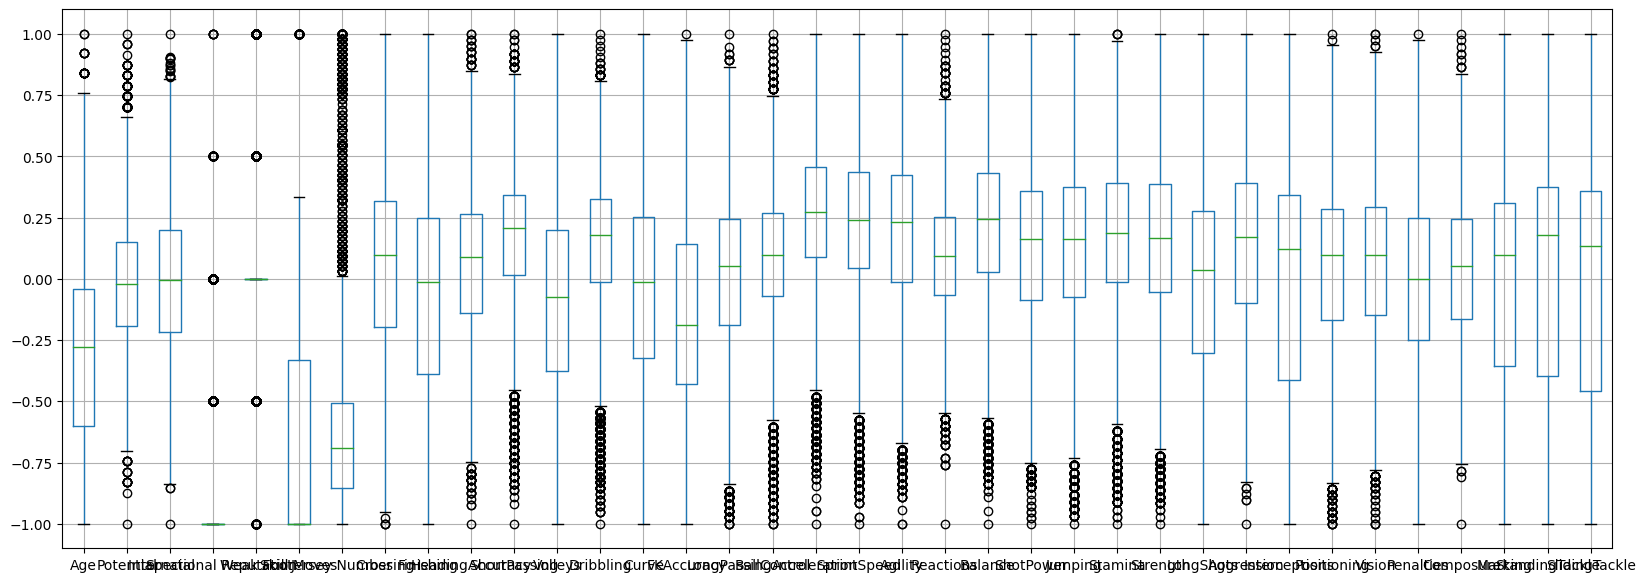

In [151]:
x.boxplot(figsize=(20,7))

An example of representing just one attribute

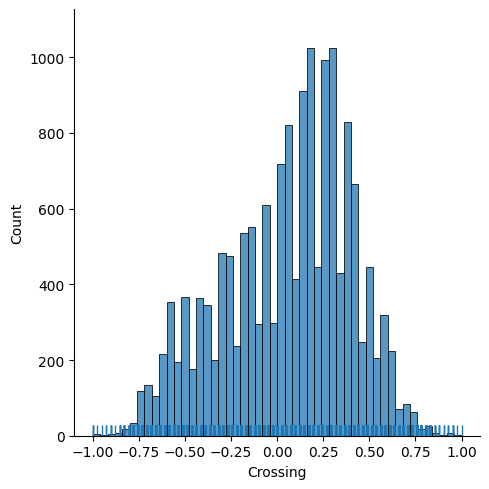

In [152]:
sns.displot(x["Crossing"],kde=False,rug=True)

<AxesSubplot: >

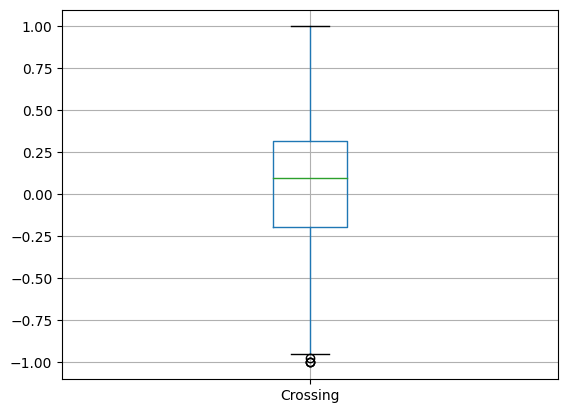

In [153]:
x.boxplot(column=["Crossing"])

In [154]:
x.describe()

,Age,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,...,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,-0.279578,0.000665,-0.008453,-0.942253,0.002295,-0.644999,-0.640738,0.053537,-0.064418,0.064942,...,-0.025506,0.136145,-0.013976,0.043417,0.060219,0.003275,0.036497,-0.016356,0.010054,-0.021365
std,0.363768,0.258486,0.291911,0.198271,0.318458,0.411882,0.321552,0.344606,0.385352,0.293820,...,0.379027,0.352347,0.458493,0.349409,0.314939,0.312770,0.274291,0.409949,0.461961,0.473324
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.600000,-0.191489,-0.218425,-1.000000,0.000000,-1.000000,-0.855670,-0.195122,-0.388235,-0.139241,...,-0.301205,-0.097561,-0.414634,-0.166667,-0.146341,-0.250000,-0.162162,-0.357143,-0.397590,-0.456790
50%,-0.280000,-0.021277,-0.004458,-1.000000,0.000000,-1.000000,-0.690722,0.097561,-0.011765,0.088608,...,0.036145,0.170732,0.121951,0.095238,0.097561,0.000000,0.054054,0.095238,0.180723,0.135802
75%,-0.040000,0.148936,0.197251,-1.000000,0.000000,-0.333333,-0.505155,0.317073,0.247059,0.265823,...,0.277108,0.390244,0.341463,0.285714,0.292683,0.250000,0.243243,0.309524,0.373494,0.358025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Saving** attributes matrix *x* and target labels *t*  to csv files.

In [155]:
x.to_csv (ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)